# Filter Design for Accels/Gyros

The difference equation for a causal IIR filter:
$$
y[n] = \sum_{k=0}^{M} b[k] \cdot x[n-k] - \sum_{k=1}^{N} a[k] \cdot y[n-k]
$$

In compact form:
$$
y[n] = b[0] \cdot x[n] + b[1] \cdot x[n-1] + \ldots + b[M] \cdot x[n-M] - a[1] \cdot y[n-1] - \ldots - a[N] \cdot y[n-N]
$$

The transfer function representation in the frequency domain:

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{b[0] + b[1]z^{-1} + \ldots + b[M]z^{-M}}{1 - a[1]z^{-1} - \ldots - a[N]z^{-N}}
$$

## References

- [Applying digital filters in Python](https://www.samproell.io/posts/yarppg/digital-filters-python/)

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy import signal
from numpy import pi

from IPython.display import display, Math, Latex

In [2]:
def plot(sys, title, fs):
    w, h = signal.freqz(*sys) # (b, a), fs default is Niquist (pi)
    hz = w *(0.5*fs/np.pi) # convert to Hz
    fig, ax1 = plt.subplots()
    ax1.set_title(title)
    ax1.plot(hz, 20 * np.log10(abs(h)), 'b')
    ax1.set_ylabel('Amplitude [dB]', color='b')
    ax1.set_xlabel('Hz')
    # ax1.set_xlabel('Frequency [rad/sample]')
    ax1.grid(True)
    # ax1.set_ylim([-120, 20])
    ax2 = ax1.twinx()
    angles = np.rad2deg(np.unwrap(np.angle(h)))
    ax2.plot(hz, angles, 'g')
    ax2.set_ylabel('Angle (deg)', color='g')
    ax2.grid(True)
    ax2.axis('tight')
    # ax2.set_ylim([-6, 1])
    nticks = 8
    ax1.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))
    ax2.yaxis.set_major_locator(matplotlib.ticker.LinearLocator(nticks))

Num: [0.91810245 1.8362049  0.91810245]
Den: [1.         1.82948641 0.84292339]


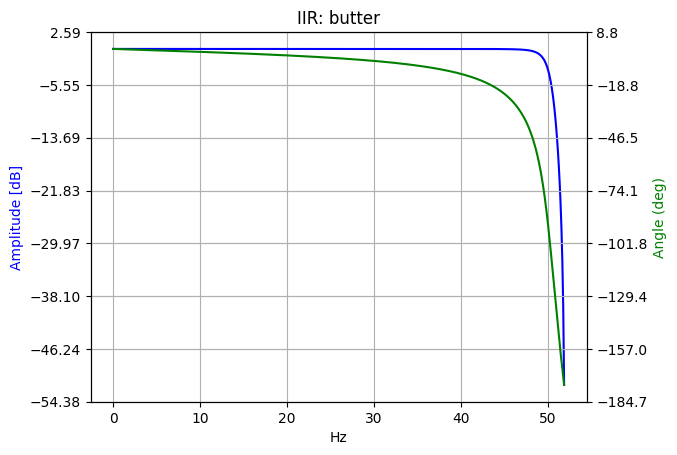

In [7]:
wp = 0.9 # 0-1, with 1 begin Niquist
ws = 0.95
gpass = 1 # dB
gstop =  20 # dB
fs = 104
order = 2
cutoff = 50

ftype = "butter"
# sys = signal.iirdesign(wp, ws, gpass, gstop, ftype=ftype)
sys = signal.iirfilter(order, Wn=cutoff, fs=fs, btype="low", ftype=ftype)
print("Num:", sys[0])
print("Den:", sys[1])
plot(sys,"IIR: " + ftype, fs)

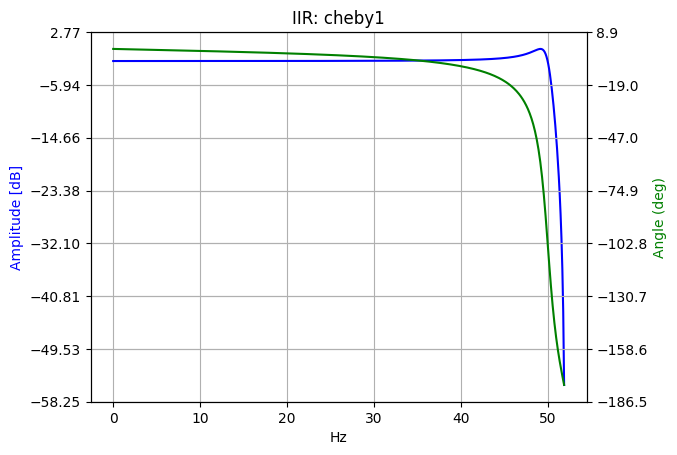

In [11]:
ftype = "cheby1"
# sys = signal.iirdesign(wp, ws, gpass, gstop, ftype=ftype)
sys = signal.iirfilter(order,rp=2,Wn=cutoff, fs=fs, btype="low", ftype=ftype)
plot(sys,"IIR: " + ftype, fs)

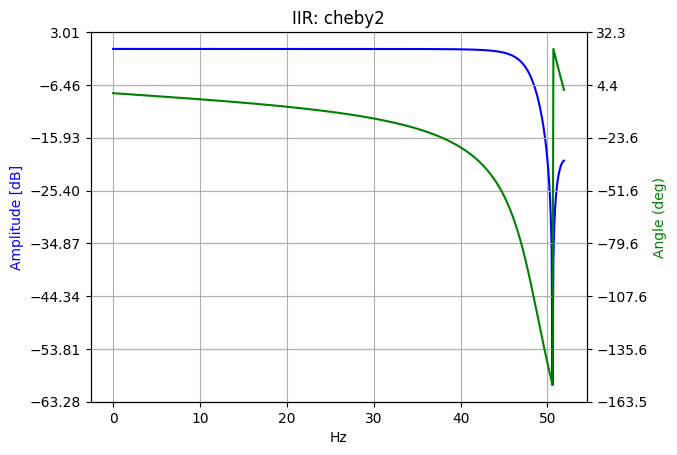

In [14]:
ftype = "cheby2"
# sys = signal.iirdesign(wp, ws, gpass, gstop, ftype=ftype)
sys = signal.iirfilter(order,rs=20,Wn=cutoff, fs=fs, btype="low", ftype=ftype)
plot(sys,"IIR: " + ftype, fs)

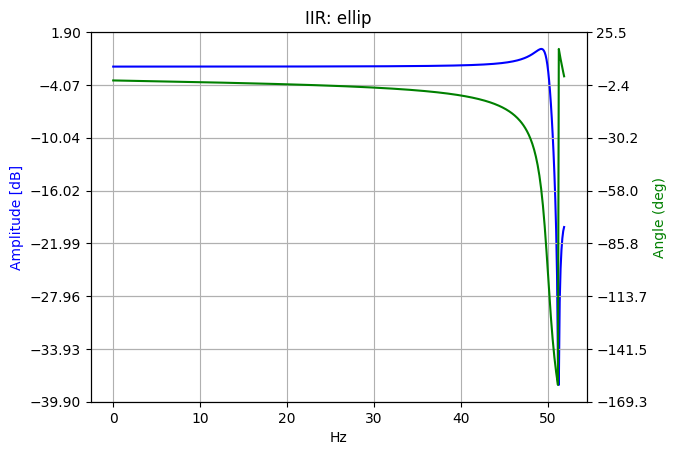

In [16]:
ftype = "ellip"
# sys = signal.iirdesign(wp, ws, gpass, gstop, ftype=ftype)
sys = signal.iirfilter(order,rp=2,rs=20,Wn=cutoff, fs=fs, btype="low", ftype=ftype)
plot(sys,"IIR: " + ftype, fs)

In [20]:
size = 1000
t = np.arange(size)
sig = np.cos(np.pi*t/250)+np.random.normal(0,0.05,size)

In [32]:
wp = 0.8 # 0-1, with 1 Niquist freq at 1.0
ws = 0.95
gpass = .9 # dB
gstop =  20 # dB
fs = 104
ftype="cheby1"
order = 4
# sys = signal.iirdesign(wp, ws, gpass, gstop, ftype="cheby2",fs=np.pi)
sys = signal.iirfilter(order,rp=1,Wn=cutoff, fs=fs, btype="low", ftype=ftype)
print(sys[0],"\n",sys[1])
y = signal.lfilter(*sys,sig)

[0.75332569 3.01330278 4.51995416 3.01330278 0.75332569] 
 [1.         3.65503017 5.03909089 3.10660404 0.72320019]


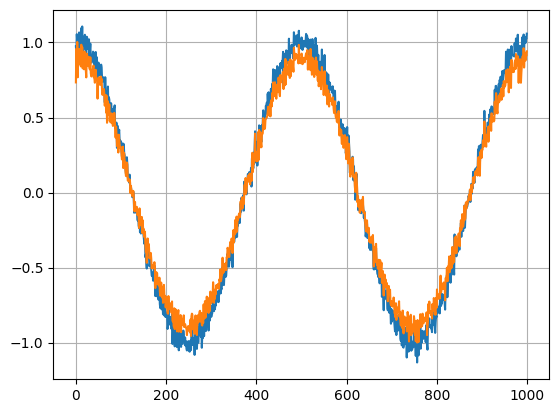

In [33]:
plt.plot(t,sig)
plt.plot(t,y)
plt.grid(True);

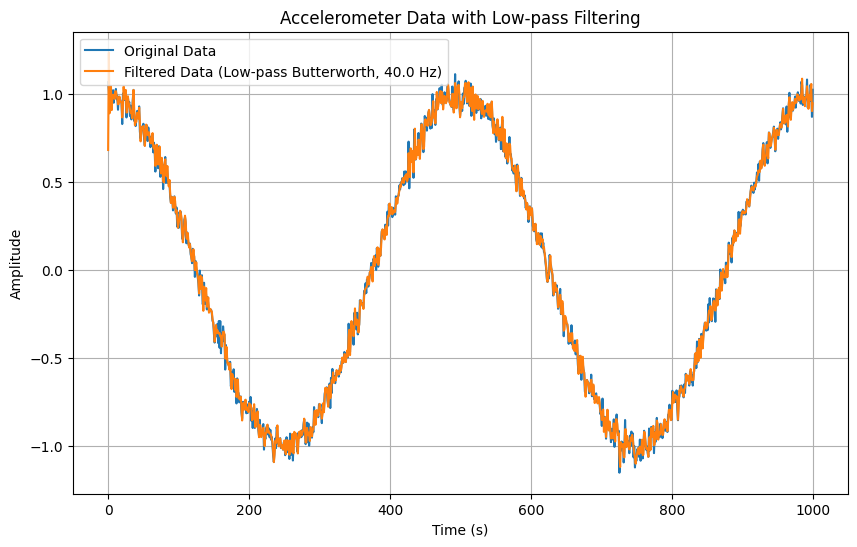

In [97]:
# Generate example accelerometer data (replace this with your actual data)
fs = 100  # Sampling frequency (Hz)
# t = np.arange(0, 10, 1/fs)  # Time vector
# accel_data = np.sin(2 * np.pi * 5 * t) + 0.5 * np.random.normal(size=len(t))

# Design parameters
cutoff_frequency = 40.0  # Adjust this based on your data (Hz)
order = 2 # Filter order

# Design the low-pass Butterworth filter
b, a = signal.butter(order, cutoff_frequency / (0.5 * fs), btype='low', analog=False, output='ba')

# Apply the filter to the accelerometer data
# filtered_accel_data = signal.lfilter(b, a, accel_data)
filtered_accel_data = signal.lfilter(b, a, sig)

# Plot the original and filtered accelerometer data
plt.figure(figsize=(10, 6))
# plt.plot(t, accel_data, label='Original Data')
plt.plot(t, sig, label='Original Data')
plt.plot(t, filtered_accel_data, label=f'Filtered Data (Low-pass Butterworth, {cutoff_frequency} Hz)')
plt.title('Accelerometer Data with Low-pass Filtering')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)

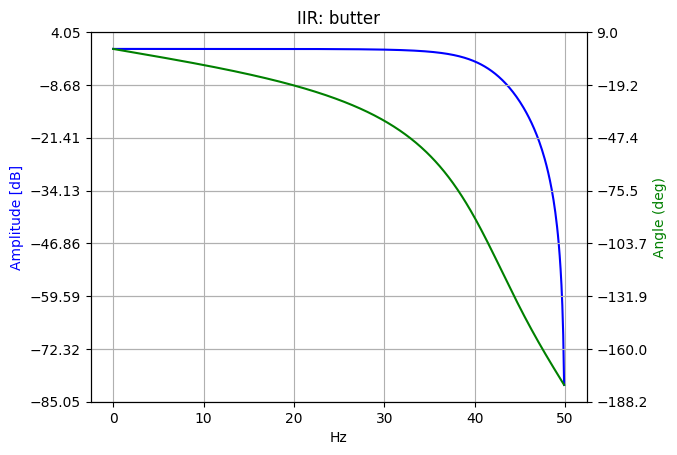

In [98]:
ftype = "butter"
sys = [b,a]
plot(sys,"IIR: " + ftype, fs)

In [96]:
def phase_to_time_delay(phase, frequency):
    return -phase / (2 * np.pi * frequency)

# Example usage:
phase_angle = -50.5  # Replace with your actual phase angle in radians
frequency = 40.0  # Replace with the frequency in hertz

time_delay = phase_to_time_delay(phase_angle, frequency)
print(f"Time Delay: {time_delay} seconds")

Time Delay: 0.20093311565351787 seconds
